___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Plotly and Cufflinks

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

https://plotly.com/

https://plotly.com/python/

https://github.com/santosjorge/cufflinks

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks
    pip install chart-studio

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

PLEASE READ THIS! DON"T SKIP!
Hi Everyone!

There have been some recent updates to Plotly in May of 2020 which I wanted to let you know about! There's over 300,000 students in this course, so a lot of students are still running older versions of our files and libraries, so it makes it hard to strike a balance between new users on the latest updates and the majority of students still on older versions. So we've kept the videos and notebooks to match what "older" students will see, and here are 3 changes you will have to do if you are watching this post May 2020:

1. Possible Import Error 1: You need to install a new package. In your command line type and run:

pip install chart-studio

Then in jupyter make sure you import it by running the code:

import chart_studio.plotly as py



2.Possible Colorscale Error 2: In the "Real Data US Map Choropleth", when you are creating the data dictionary, make sure the colorscale line is = 'ylorbr', not 'YIOrbr'... so like this:

colorscale='ylorbr'



3.Possible projection Error 3: In the "World Map Choropleth", when you are creating the layout, ensure that your projection line is = {'type':'mercator'} not Mercator with a capital...so like this:

projection={'type':'mercator'}



Please search the QA forums before posting a new question on this, as there are already quite a few answered posts.

Thanks!

Jose

In [1]:
import chart_studio.plotly as py

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.14.1


In [4]:
import cufflinks as cf
cf.__version__

'0.17.3'

In [5]:
# For Notebooks
init_notebook_mode(connected=True)

In [6]:
# For offline use
cf.go_offline()

### Fake Data

In [7]:
df = pd.DataFrame(
  np.random.randn(100, 4),
  columns=['A', 'B', 'C', 'D']
)

In [8]:
df.head()

,A,B,C,D
0,2.458557,1.517683,0.378779,0.249273
1,-1.590231,-0.868863,-1.374853,-1.365425
2,1.402159,-1.598543,-0.658671,-0.236155
3,1.381681,0.053918,-0.168370,0.335550
4,1.462759,1.239631,-0.444180,-1.061751


In [9]:
df2 = pd.DataFrame({
  'Category':['A','B','C'],
  'Values':[32,43,50]}
)

In [10]:
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [11]:
df

,A,B,C,D
0,2.458557,1.517683,0.378779,0.249273
1,-1.590231,-0.868863,-1.374853,-1.365425
2,1.402159,-1.598543,-0.658671,-0.236155
3,1.381681,0.053918,-0.168370,0.335550
4,1.462759,1.239631,-0.444180,-1.061751
...,...,...,...,...
95,-0.981220,1.957019,0.560464,2.309320
96,-0.241191,0.445751,1.526590,0.261110
97,0.238603,1.141838,-1.752494,-0.043798
98,0.887123,0.312623,0.872948,-0.949268


<Axes: >

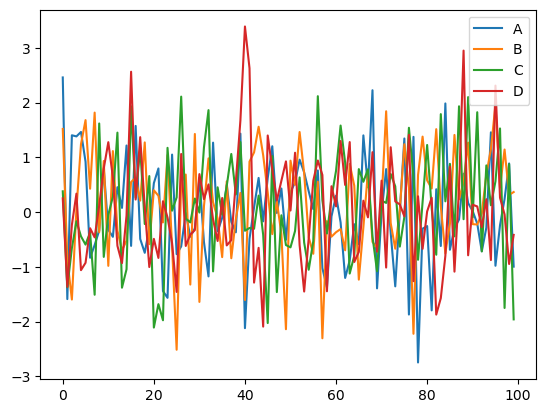

In [12]:
df.plot()

In [13]:
import nbformat
nbformat.__version__

'5.8.0'

In [14]:
# plotly interactive plot
df.iplot()

## Scatter

In [20]:
df.iplot(
  kind='scatter',
  x='A',
  y='B',
  mode='markers', # to not show lines between points
)

## Bar Plots

In [23]:
df2.iplot(
  kind='bar',
  x='Category',
  y='Values'
)

In [25]:
df.iplot(kind='bar')

In [33]:
df.count().iplot(kind='bar')

## Boxplots

In [26]:
df.iplot(kind='box')

In [34]:
df.iplot(kind='box')

## 3d Surface

In [28]:
df3 = pd.DataFrame({
  'x': [1,2,3,4,5],
  'y': [10,20,30,20,10],
  'z': [500,400,300,200,100]
})
df3


,x,y,z
0,1,10,500
1,2,20,400
2,3,30,300
3,4,20,200
4,5,10,100


In [29]:
df3.iplot(kind='surface',)

In [30]:
df3 = pd.DataFrame({
  'x':[1,2,3,4,5],
  'y':[10,20,30,20,10],
  'z':[5,4,3,2,1]
})
df3.iplot(kind='surface',colorscale='rdylbu')

## Spread

In [33]:
import numpy as np

In [34]:
df[['A','B']].iplot(kind='spread')

/home/luis/miniconda3/envs/ml/lib/python3.10/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/home/luis/miniconda3/envs/ml/lib/python3.10/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



## histogram

In [31]:
df['A'].iplot(
  kind='hist',
)

In [36]:
df['A'].iplot(kind='hist',bins=50)

In [40]:
df.iplot(kind='hist')

In [61]:
df.iplot(kind='bubble', x='A', y='B', size='C', colorscale='ylgn')


## scatter_matrix()

Similar to sns.pairplot()

In [52]:
# Be careful if too many data points
# you can endupcrashing your jupiter notebook
df.scatter_matrix()


In [59]:
df['A'].iplot(
    kind='histogram',
    bins=50,
)



In [60]:
df['A'].iplot(
    kind='line',
    bins=50,
)

# Great Job!